Start with a small-scale demonstration

graph before transformation


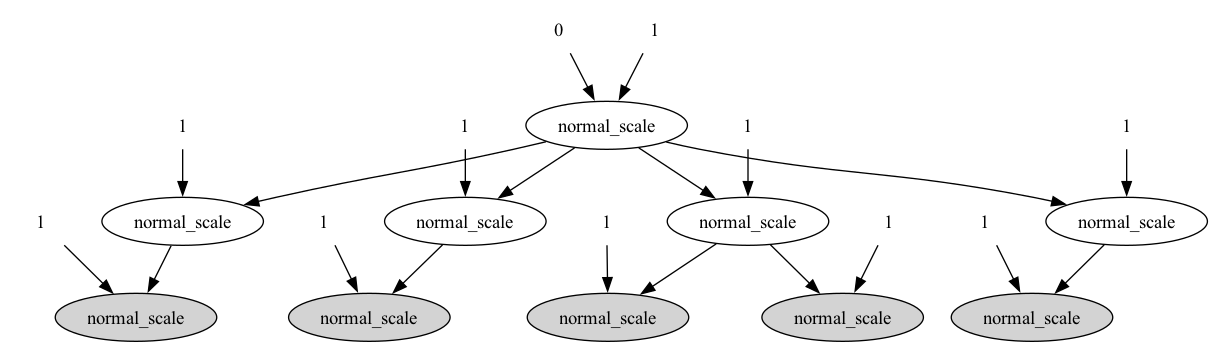

graph after transformation


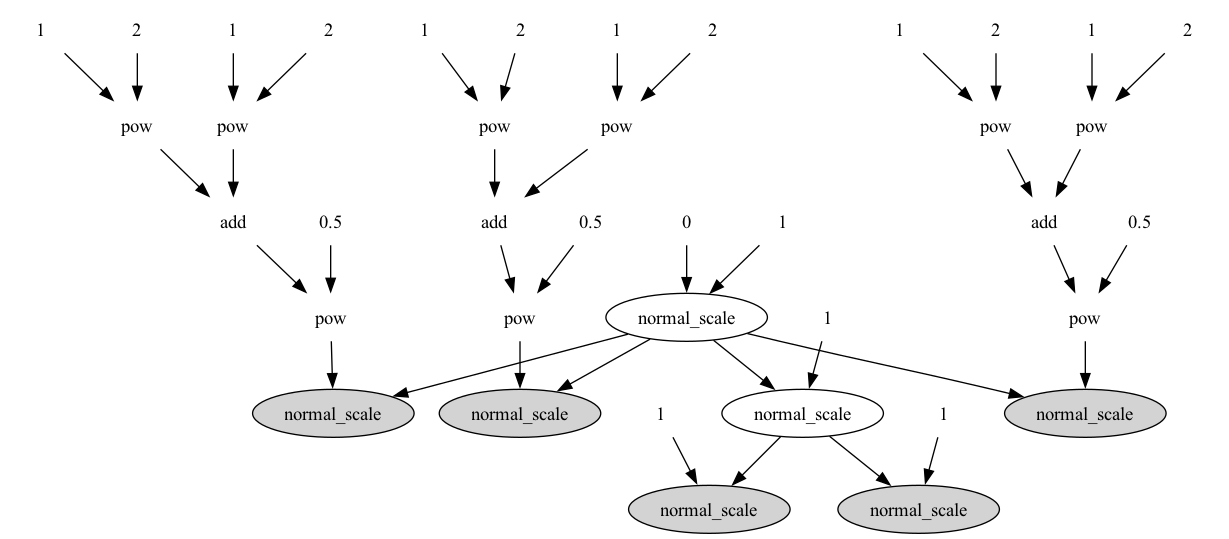

In [1]:
from pangolin import normal, viz_upstream, inference_stan, print_upstream, Calculate
from pangolin.transforms.normal_normal import normal_normal
from pangolin.transforms.transforms import apply_transforms
import numpy as np
np.set_printoptions(precision=2)

n_x = 10
n_y = 5
np.random.seed(0)
g = list(np.random.randint(0, n_x, n_y))
obs = list(range(n_y))

x = normal(0, 1)
xi = [normal(x, 1) for i in range(n_x)]
yi = [normal(xi[g[j]], 1) for j in range(n_y)]

print("graph before transformation")
display(viz_upstream(yi, yi))

[new_x, new_xi, new_yi], new_given, new_obs = apply_transforms([normal_normal], [x, xi, yi], yi, obs)

print("graph after transformation")
display(viz_upstream(new_yi,new_given))

Now do somewhat larger scale

graph before transformation


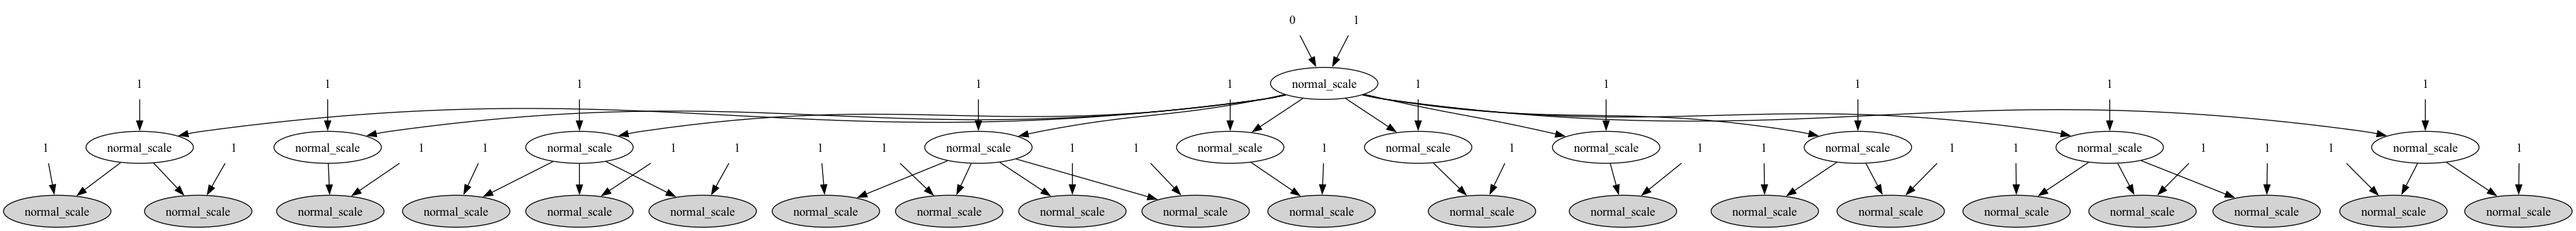

graph after transformation


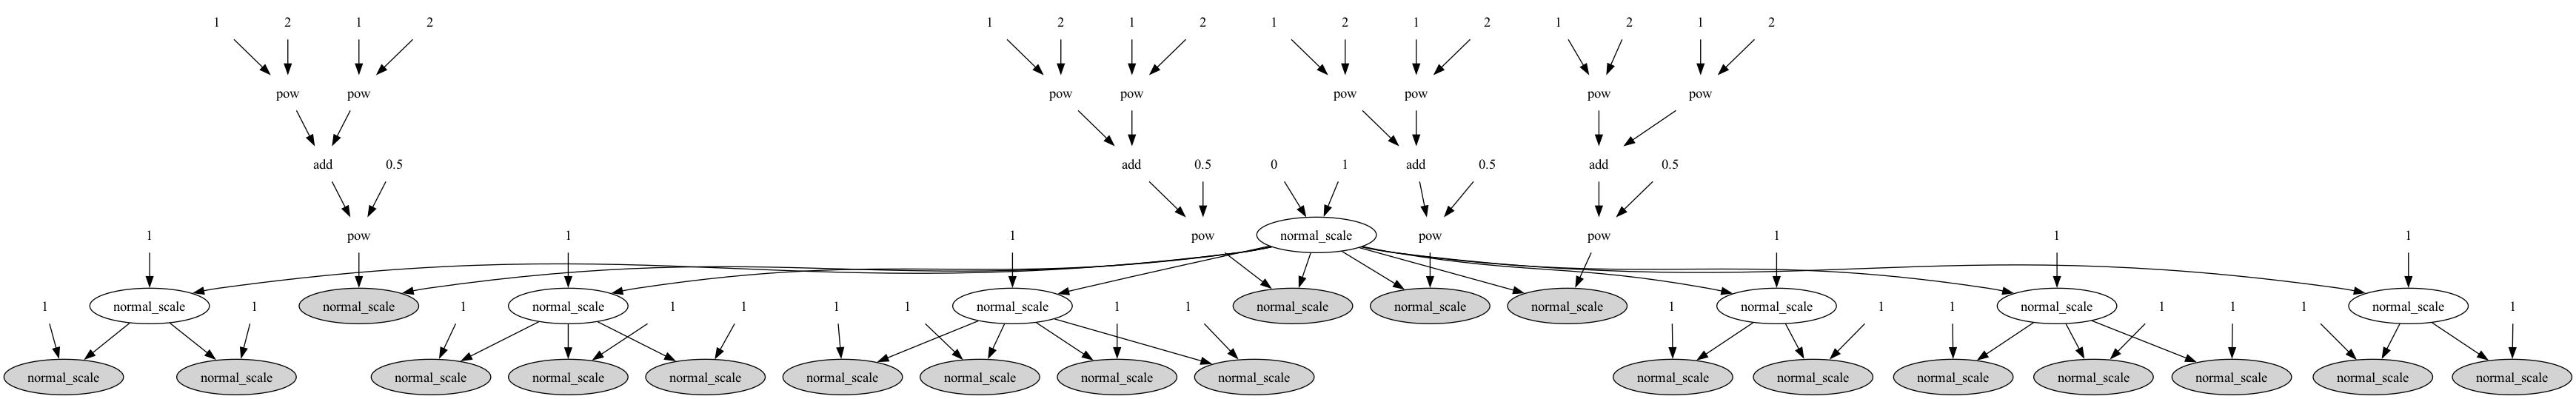

In [2]:
n_x = 10
n_y = 20
np.random.seed(0)
g = list(np.random.randint(0, n_x, n_y))
obs = list(range(n_y))

x = normal(0, 1)
xi = [normal(x, 1) for i in range(n_x)]
yi = [normal(xi[g[j]], 1) for j in range(n_y)]

print("graph before transformation")
display(viz_upstream(yi, yi))

[new_x, new_xi, new_yi], new_given, new_obs = apply_transforms([normal_normal], [x, xi, yi], yi, obs)

print("graph after transformation")
display(viz_upstream(new_yi,new_given))

Now try actually doing inference.

In [3]:
calc = Calculate(engine="stan", niter=1000)
xs, xis = calc.sample([new_x, new_xi],new_given,new_obs, mode='mcmc')

11:57:54 - cmdstanpy - INFO - compiling stan file /Users/j/PycharmProjects/pangolin/demos/.stan/model38003201.stan to exe file /Users/j/PycharmProjects/pangolin/demos/.stan/model38003201
11:58:10 - cmdstanpy - INFO - compiled model executable: /Users/j/PycharmProjects/pangolin/demos/.stan/model38003201


t1-t0=16.256123065948486


11:58:10 - cmdstanpy - INFO - CmdStan start processing
11:58:10 - cmdstanpy - INFO - Chain [1] start processing
11:58:10 - cmdstanpy - INFO - Chain [1] done processing


Inference on un-transformed variables

In [4]:
print(calc.E([x,xi],yi,obs))

11:58:10 - cmdstanpy - INFO - CmdStan start processing
11:58:10 - cmdstanpy - INFO - Chain [1] start processing
11:58:10 - cmdstanpy - INFO - Chain [1] done processing


[7.72177153, [4.35005615, 13.5813114, 7.8573545000000005, 4.6770454599999995, 8.34563053, 4.88694687, 11.24737228, 10.945586650000001, 12.682442199999999, 6.34383227]]


Inference on transformed variables (basically the same)

In [6]:
print(calc.E([new_x,new_xi],new_given,new_obs))

11:58:43 - cmdstanpy - INFO - CmdStan start processing
11:58:43 - cmdstanpy - INFO - Chain [1] start processing
11:58:43 - cmdstanpy - INFO - Chain [1] done processing


[7.73584566, [4.372449269999999, 13.590564700000002, 7.8363237, 4.654245520000001, 8.35279918, 4.89534815, 11.243372920000002, 10.950152310000002, 12.6918194, 6.357805560000001]]


graph before transformation


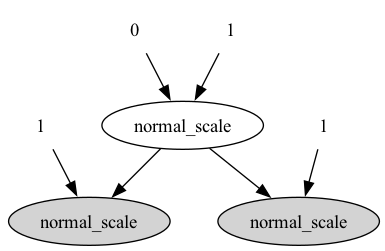

graph after transformation


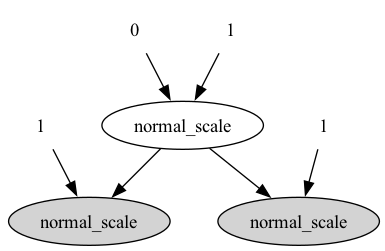

In [12]:
a = normal(0,1)
b = normal(a,1)
c = normal(a,1)
given = [b,c]
vals = [2,3]
print("graph before transformation")
display(viz_upstream([b,c],given))
[new_a, new_b, new_c], new_given, new_vals = apply_transforms([normal_normal], [a,b,c], given, vals)
print("graph after transformation")
display(viz_upstream([new_a, new_b,new_c],new_given))